In [4]:
!pip install cmake 'gym[atari]' scipy




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import gym
env = gym.make('Taxi-v3').env



/usr/local/lib/python3.7/dist-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [8]:
env.reset()

131

In [10]:
!pip install 'gym[toy_text]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 29.7 MB/s 


In [14]:
import gym


In [15]:
env = gym.make('Taxi-v3').env

/usr/local/lib/python3.7/dist-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [29]:
env.reset()   # reset environment to a new, random state    
env.render_mode


In [30]:
print("Action space",env.action_space)

Action space Discrete(6)


In [31]:
print("state space",env.observation_space)

state space Discrete(500)


In [32]:
state = env.encode(3,1,2,0)  # (taxi row, taxi column, passenger index, destination index)
print(state)

328


In [36]:
env.s =state

In [39]:
env_screen = env.render(mode = 'rgb_array')
env.close()

/usr/local/lib/python3.7/dist-packages/gym/core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


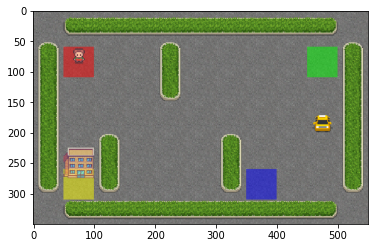

In [40]:
import matplotlib.pyplot as plt
plt.imshow(env_screen)

In [89]:
env.s = 328   # set environment to illustration's state
epochs = 0
penalties,rewards= 0,0
frames = []  # for animation
done = False

while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if(reward == -10):
    penalties += 1
   # Put each rendered frame into dict for animation
    frames.append(
        {
            'frame': env.render(mode='ansi'),
             'state': state,
              'action': action,
               'reward': reward
         
        }
    ) 
      
    epochs += 1
      
      
    print("Timesteps taken:{}".format(epochs))
    print("Penalties incurred:{}".format(penalties))


Timesteps taken:1
Penalties incurred:1
Timesteps taken:2
Penalties incurred:2


/usr/local/lib/python3.7/dist-packages/gym/core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


In [102]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    #print(frame['frame'].getvalue())
    print(f"Timestep:{i + 1}")
    print(f"state: {frame['state']}")
    print(f"Action:{frame['action']}")
    print(f"Reward:{frame['reward']}")
    sleep(1)

print_frames(frames)   

Timestep:2
state: 410
Action:5
Reward:-10


In [103]:
print(state)

410


In [104]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [105]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [109]:



import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 100000
Training finished.



In [107]:
q_table[328]

array([ -2.37832078,  -2.27325184,  -2.40829145,  -2.35193167,
        -9.94159448, -10.85821362])

In [108]:
#Evaluate agent's performance after Q-learning

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")


Results after 100 episodes:
Average timesteps per episode: 13.54
Average penalties per episode: 0.0
